**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Читаем содержимое csv файла:

In [3]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


Далее пошаговый код...

In [13]:
salaries = data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя зарплата'][data['date'].str.contains('2018')]

D:\anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [15]:
print('Средняя зарплата: ', round(salaries.value.mean(),3))
print('Максимальная зарплата: ', salaries.value.max())
print('Минимальная зарплата: ', salaries.value.min())

Средняя зарплата:  43176.455
Максимальная зарплата:  49700
Минимальная зарплата:  31599


In [14]:
pensions = data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя пенсия'][data['date'].str.contains('2018')]

D:\anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [17]:
print('Средняя пенсия: ', round(pensions.value.mean(),3))
print('Максимальная пенсия: ', pensions.value.max())
print('Минимальная пенсия: ', pensions.value.min())

Средняя пенсия:  17023.455
Максимальная пенсия:  19922
Минимальная пенсия:  14694


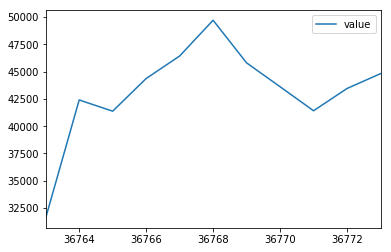

In [19]:
salaries.plot.line()

**Переходим к решению второй задачи:**

In [20]:
import bs4
import csv

In [23]:
def read_url(url):
    """ Читает содержимое сайта """
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [25]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")

In [29]:
bs = bs4.BeautifulSoup(text, 'html.parser')
day = bs.select('.forecast-label')
weather = bs.select('.forecast-text')

In [38]:
lst= []
for i in range(0, len(day)):
    lst.append(day[i].text)

lst1 = []
for i in range(len(weather)):
    lst1.append(weather[i].text)

In [41]:
list_all = list(zip(lst, lst1))
list_all2 = []

for item in list_all:
    list_all2.append(list(item))#Склеиваем в один общий список 
print(list_all2)

[['Сегодня ночью', 'Небольшая вероятность ливней и гроз до 22:00. Облачно с прояснениями около 66. Ветер юго-западный около 9 миль в час. Вероятность осадков 20%. Возможны новые осадки от десятой до четверти дюйма.'], ['Пятница', 'Местами солнечно. Высоко около 77, с температурами, падающими приблизительно к 75 днем. Северо-западный ветер от 7 до 12 миль в час, с порывами до 18 миль в час.'], ['Ночь пятницы', 'Облачно с прояснениями около 63. Северный ветер от 7 до 10 миль в час.'], ['Суббота', 'В основном солнечно, с высокой температурой около 73. Северный ветер около 10 миль в час.'], ['Субботняя ночь', 'Облачно с прояснениями, около 63. Ветер северный, 5-10 миль в час.'], ['Воскресенье', 'В основном солнечно, с высотой около 73.'], ['Воскресный вечер', 'Облачно с прояснениями около 64.'], ['Понедельник', 'Преимущественно солнечно, с высоким около 74.'], ['Ночь понедельника', 'В основном ясно, с низким около 65.'], ['Вторник', 'Солнечный, с высоким около 75.'], ['Вечер вторника', 'В 

In [42]:
def csv_writer(data, path):
    """
    Функция для записи данных в CSV
    """
    with open(path, "w", newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=';')
        for line in data:
            writer.writerow(line)       

In [43]:
csv_writer(list_all2,'weather.csv')